# イメージを読み込む (os.listdir  vs  glob.glob)

https://stackoverflow.com/questions/13643558/should-glob-glob-be-preferred-over-os-listdir-or-the-other-way-around

In [3]:
# !pip install tensorflow==1.15.0

In [4]:
# !pip install matplotlib

In [5]:
import pandas as pd

In [6]:
# !pip install sklearn

In [7]:
import numpy  as np
import os
import glob 
import re

import matplotlib.pyplot as plt

from PIL import Image

%matplotlib inline

## osを使用する場合

In [15]:
path = 'kaggle_simpson_testset/' 
flist = os.listdir(path)
# kaggle_simpson_testset/

In [9]:
# !ls -a kaggle_simpson_testset/

In [10]:
# flist

In [11]:
# 不可視ファイルの.DS_Storeファイルを除いて読み込む

'''
余談

.DS_Storeファイルとは？ 開けるの？

https://miloserdov.org/?p=3867

'''


# flist_ignore = [name for name in os.listdir(path) if not name.startswith('.')]
# flist_ignore

'\n余談\n\n.DS_Storeファイルとは？ 開けるの？\n\nhttps://miloserdov.org/?p=3867\n\n'

## globを使用する場合

In [16]:
img_list = glob.glob(path + '/*' + ".jpg")

In [88]:
# img_list 

In [18]:
import cv2

### 【問題1】自作データセットでの分類の学習
自作のデータセットに対して分類問題を解いてください。任意の実装を使用してください。

In [19]:
marge_simpson_array_X = np.empty((0, 200, 200, 3))
lisa_simpson_array_X = np.empty((0, 200, 200, 3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('lisa_simpson', img):
        
        marge_simpson_ = cv2.imread(img)
        marge_simpson_ = cv2.cvtColor(marge_simpson_, cv2.COLOR_BGR2RGB)

        # サイズを揃える
        marge_simpson_ = cv2.resize(marge_simpson_, dsize= (200, 200))
        marge_simpson_ = marge_simpson_ / 255
        
        # axisの追加
        marge_simpson = marge_simpson_.reshape(1, 200, 200, 3)
        
        # arrayに格納
        marge_simpson_array_X = np.concatenate([marge_simpson_array_X, marge_simpson], axis = 0)
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('lisa_simpson', img):
        
        lisa_simpson_ = cv2.imread(img)
        lisa_simpson_ = cv2.cvtColor(lisa_simpson_, cv2.COLOR_BGR2RGB)

        lisa_simpson_ = cv2.resize(lisa_simpson_, dsize= (200, 200))
        lisa_simpson_ = lisa_simpson_ / 255
        
        lisa_simpson = lisa_simpson_.reshape(1, 200, 200, 3)
        
        lisa_simpson_array_X = np.concatenate([lisa_simpson_array_X, lisa_simpson], axis = 0)
        
marge_simpson_array_y = np.zeros([marge_simpson_array_X.shape[0]])
lisa_simpson_array_y = np.ones([lisa_simpson_array_X.shape[0]])

In [20]:
print('marge_simpson_X:{}\nlisa_simpson_X:{}'.format(marge_simpson_array_X.shape, lisa_simpson_array_X.shape))
print('marge_simpson_y:{}  \nlisa_simpson_y:{}'.format(marge_simpson_array_y.shape, lisa_simpson_array_y.shape))

marge_simpson_X:(50, 200, 200, 3)
lisa_simpson_X:(50, 200, 200, 3)
marge_simpson_y:(50,)  
lisa_simpson_y:(50,)


In [21]:
X_data = np.concatenate([marge_simpson_array_X, lisa_simpson_array_X], axis = 0)
y_data = np.concatenate([marge_simpson_array_y, lisa_simpson_array_y], axis = 0)

In [22]:
print('X_data:{}  y_data:{}'.format(X_data.shape, y_data.shape))

X_data:(100, 200, 200, 3)  y_data:(100,)


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.3, random_state=42)

In [25]:
print('X_train:{}\nX_test:{}'.format(X_train.shape, X_test.shape))
print('y_train:{}  \ny_test:{}'.format(y_train.shape, y_test.shape))

X_train:(70, 200, 200, 3)
X_test:(30, 200, 200, 3)
y_train:(70,)  
y_test:(30,)


In [26]:
y_train

array([0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1.])

In [41]:
from keras import layers
from keras import models

In [244]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(200, 200 , 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [245]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 147456)            0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               75497984  
_________________________________________________________________
dense_22 (Dense)             (None, 1)               

In [246]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['acc'])
model.fit(X_train[:20], y_train[:20], epochs=5, batch_size=5)

Epoch 1/5
20/20 [==============================] - 16s 783ms/step - loss: 9.3379 - acc: 0.6000
Epoch 2/5
20/20 [==============================] - 15s 725ms/step - loss: 0.9136 - acc: 0.6500
Epoch 3/5
20/20 [==============================] - 11s 554ms/step - loss: 0.4906 - acc: 0.7000
Epoch 4/5
20/20 [==============================] - 16s 801ms/step - loss: 0.3830 - acc: 0.8500
Epoch 5/5
20/20 [==============================] - 12s 622ms/step - loss: 0.3427 - acc: 0.8500


In [247]:
test_loss, test_acc = model.evaluate(X_test[:10], y_test[:10])
test_acc

10/10 [==============================] - 1s 57ms/step


0.4000000059604645

### その他実験

In [27]:
# 配列のまま出力

print('データ型:', lisa_simpson_array_X[49].dtype)
print(type(lisa_simpson_array_X[49]))

lisa_simpson_array_X[49].shape

データ型: float64
<class 'numpy.ndarray'>


(200, 200, 3)

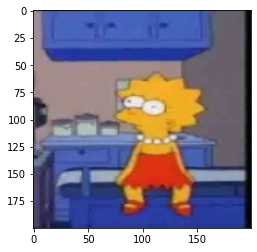

In [28]:
plt.imshow(  lisa_simpson_array_X[49])

plt.show()

In [29]:
'''

画像の中心を切り出し

https://note.nkmk.me/python-pillow-image-crop-trimming/

'''


def crop_center(pil_img, crop_width, crop_height):
    
    img_width, img_height = pil_img.size
    
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))


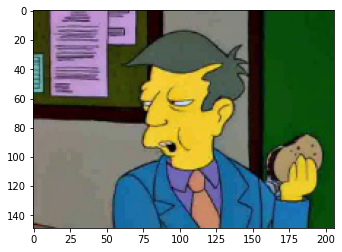

In [30]:
img = Image.open(img_list[3])
plt.imshow(img)

plt.show()

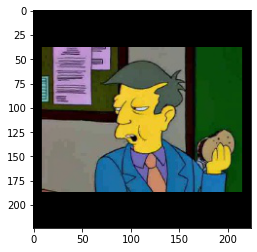

In [31]:
img = Image.open(img_list[3])

img_new = crop_center(img, 224, 224)

plt.imshow(img_new)

plt.show()

<class 'PIL.Image.Image'>


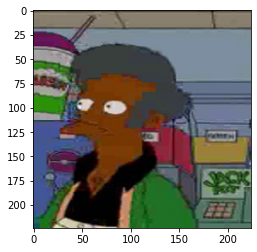

In [32]:
img = Image.open(img_list[4])

img_resize = img.resize((224,224))

print(type(img_resize))

plt.imshow(img_resize)

plt.show()

## Kerasでもやってみよう

In [33]:
# !pip install keras

In [34]:
from keras.preprocessing.image import load_img, img_to_array

Using TensorFlow backend.


In [35]:
img_keras = load_img(img_list[4], grayscale=False, color_mode='rgb', target_size=(224,224))

img_keras_array = img_to_array(img_keras) / 255.

print('データ型:', img_keras_array.dtype)

img_keras_array.shape

データ型: float32


(224, 224, 3)

<class 'PIL.Image.Image'>


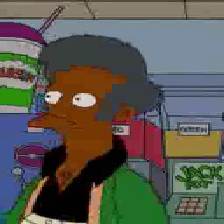

In [36]:
print(type(img_keras))

img_keras

# openCVの色形式

In [189]:
# !pip install opencv-python

In [37]:
# import cv2

## グレースケール 

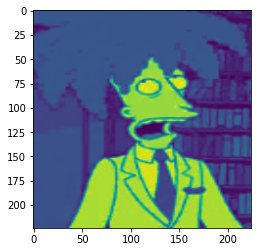

In [38]:
# 第二引数を0にするとグレースケールで読み込める
img = cv2.imread(img_list[5], 0)

# cv2でリサイズ
img = cv2.resize(img, (224, 224))

plt.imshow(img)

plt.show()

## BGRとRGB

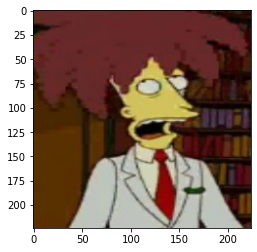

In [39]:
'''

なぜ彼らはOpenCVでBGRカラースペースを選択したのですか？

OpenCVの初期の開発者がBGRカラー形式を選択した理由は、
当時のBGRカラー形式がカメラメーカーとソフトウェアプロバイダーの間で人気があったためです。
たとえば、Windowsでは、COLORREFを使用して色の値を指定する場合、BGR形式0x00bbggrrを使用します。

BGRは歴史的な理由から選択されたものであり、今ではBGRと共存しなければなりません。
言い換えれば、BGRはOpenCVの馬のお尻です。

https://www.learnopencv.com/why-does-opencv-use-bgr-color-format/

'''


img = cv2.imread(img_list[5])
img = cv2.resize(img, (224, 224))

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# RGBチャネル

plt.imshow(img_rgb)

plt.show()

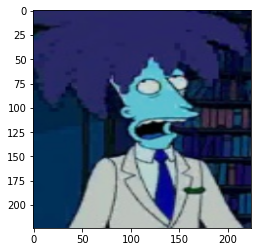

In [40]:
# BGRチャネル

plt.imshow(img)

plt.show()

### 実験　終わり

### 【問題2】分類データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。

In [58]:
# !pip install albumentations

In [42]:
from urllib.request import urlopen
import albumentations as albu

(200, 200, 3)


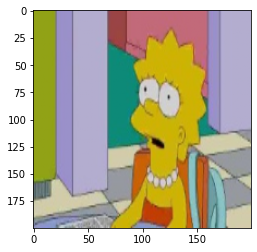

In [43]:
image = X_train[0]
print(image.shape)
plt.imshow(image)

In [65]:
# augmentationのリスト
transform = [
  albu.HorizontalFlip(p=1),
  albu.VerticalFlip(p=1),
  albu.RandomRotate90(p=1),
  albu.ElasticTransform(p=1, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
  albu.GridDistortion(p=1),
  albu.OpticalDistortion(p=1, distort_limit=1, shift_limit=0.5),
  albu.Blur(blur_limit=21, p=1),
  albu.ChannelShuffle(p=1),
  albu.ToGray(p=1),
  albu.RGBShift(p=1)
]

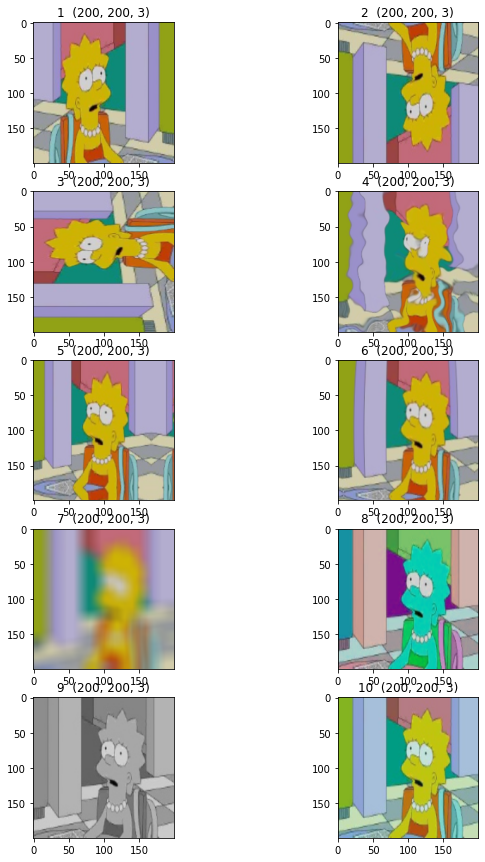

In [66]:
plt.figure(figsize=(10, 15))
for i, trans in enumerate(transform):
    plt.subplot(5, 2, i+1)
    img = (X_train[0]*255).astype(np.uint8)
    img = trans(image=img)['image']
    plt.title(str(i+1)+'  '+ str(img.shape))
    plt.imshow(img)

In [46]:
X_train[:20].shape

(20, 200, 200, 3)

In [47]:
X_train_20 = X_train[:20]

In [48]:
y_train_20 = y_train[:20]

In [49]:
X_train_auged = X_train_20.copy()
y_train_auged = y_train_20.copy()
count = 0
for i in range(20):
    for  trans in transform:
        img = X_train_20[i]
        target = np.array(y_train_20[i])
        img = (X_train[0]*255).astype(np.uint8)
        img = trans(image=img)['image']
        img = img/255
        img = img.reshape(1, 200, 200, 3)
        target = target.reshape(1)
        X_train_auged = np.concatenate([X_train_auged, img], axis = 0)
        y_train_auged = np.concatenate([y_train_auged, target], axis = 0)
        count += 1
print(count)

200


In [50]:
X_train_auged.shape

(220, 200, 200, 3)

In [51]:
y_train_auged.shape

(220,)

In [248]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(200, 200 , 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 147456)            0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)               75497984  
_________________________________________________________________
dense_24 (Dense)             (None, 1)               

In [249]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['acc'])
model.fit(X_train_auged, y_train_auged, epochs=5, batch_size=5)

Epoch 1/5
220/220 [==============================] - 143s 652ms/step - loss: 2.4879 - acc: 0.6000
Epoch 2/5
220/220 [==============================] - 146s 662ms/step - loss: 0.7161 - acc: 0.6455
Epoch 3/5
220/220 [==============================] - 230s 1s/step - loss: 0.6748 - acc: 0.6409
Epoch 4/5
220/220 [==============================] - 143s 648ms/step - loss: 0.6643 - acc: 0.6500
Epoch 5/5
220/220 [==============================] - 220s 1000ms/step - loss: 0.6632 - acc: 0.6545


In [250]:
test_loss, test_acc = model.evaluate(X_test[:10], y_test[:10])
test_acc

10/10 [==============================] - 1s 133ms/step


0.6000000238418579

### 少し精度上がった

### 【問題3】物体検出データセットの用意
次に、物体検出を行います。バウンディングボックスのアノテーションを行い物体検出のためのデータセットを作成してください。

In [106]:
!git clone https://github.com/tzutalin/labelImg.git

Cloning into 'labelImg'...
remote: Enumerating objects: 1563, done.
error: RPC failed; curl 56 LibreSSL SSL_read: SSL_ERROR_SYSCALL, errno 54
fatal: the remote end hung up unexpectedly
fatal: early EOF
fatal: index-pack failed


In [116]:
!pip install pyqt5 lxml # Install qt and lxml by pip

  Using cached PyQt5-5.14.2-5.14.2-cp35.cp36.cp37.cp38-abi3-macosx_10_6_intel.whl (43.1 MB)
     |████████████████████████████████| 4.5 MB 1.2 MB/s eta 0:00:01     |██████▌                         | 921 kB 623 kB/s eta 0:00:06
  Using cached PyQt5_sip-12.7.2-cp37-cp37m-macosx_10_9_x86_64.whl (63 kB)


In [120]:
!make pyqt5

make: *** No rule to make target `pyqt5'.  Stop.


In [122]:
!python libs/resources.py resources.qrc

python: can't open file 'libs/resources.py': [Errno 2] No such file or directory


In [121]:
!python labelImg-master/labelImg.py

Traceback (most recent call last):
  File "labelImg-master/labelImg.py", line 30, in <module>
    from libs.resources import *
ModuleNotFoundError: No module named 'libs.resources'


In [ ]:
# インストール不可

### 【問題4】物体検出データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。前述のalbumentationsはバウンディングボックスを合わせての加工が可能です。詳細はREADME.mdを確認してください。

In [70]:
from albumentations import (
    BboxParams,
    HorizontalFlip,
    VerticalFlip,
    Resize,
    CenterCrop,
    RandomCrop,
    Crop,
    Compose
)

In [53]:
# Functions to visualize bounding boxes and class labels on an image. 
# Based on https://github.com/facebookresearch/Detectron/blob/master/detectron/utils/vis.py

BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)


def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img


def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(12, 12))
    plt.imshow(img)

In [54]:
def get_aug(aug, min_area=0., min_visibility=0.):
    return Compose(aug, bbox_params=BboxParams(format='coco', min_area=min_area, 
                                               min_visibility=min_visibility, label_fields=['category_id']))

In [89]:
image = X_train[8]

In [98]:
annotations = {'image': image, 'bboxes': [[55, 80, 90, 100]], 'category_id': [y_train[8]]}
category_id_to_name = {0: 'marge_simpson', 1: 'lisa_simpson'}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


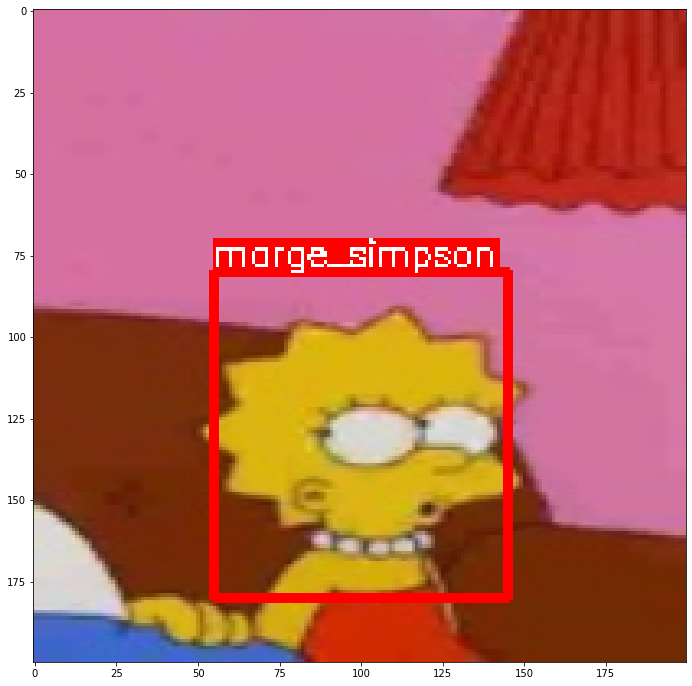

In [100]:
visualize(annotations, category_id_to_name)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


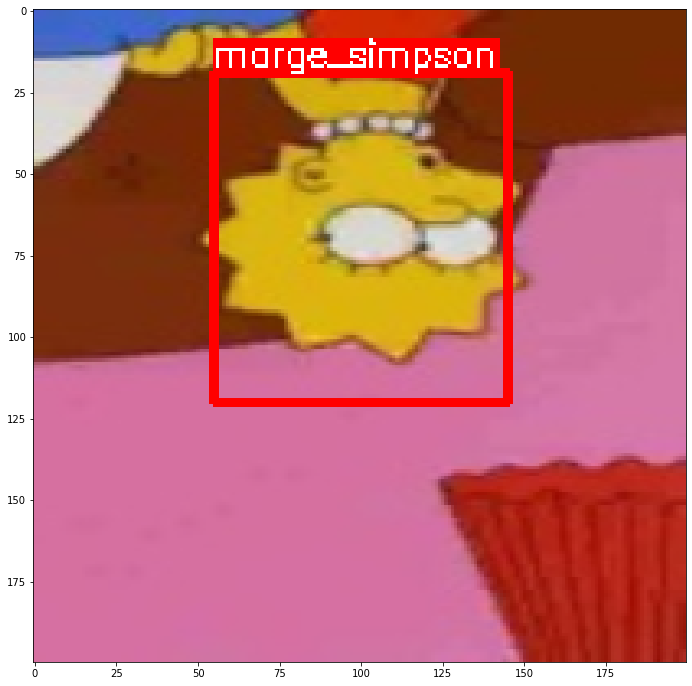

In [101]:
aug = get_aug([VerticalFlip(p=1)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


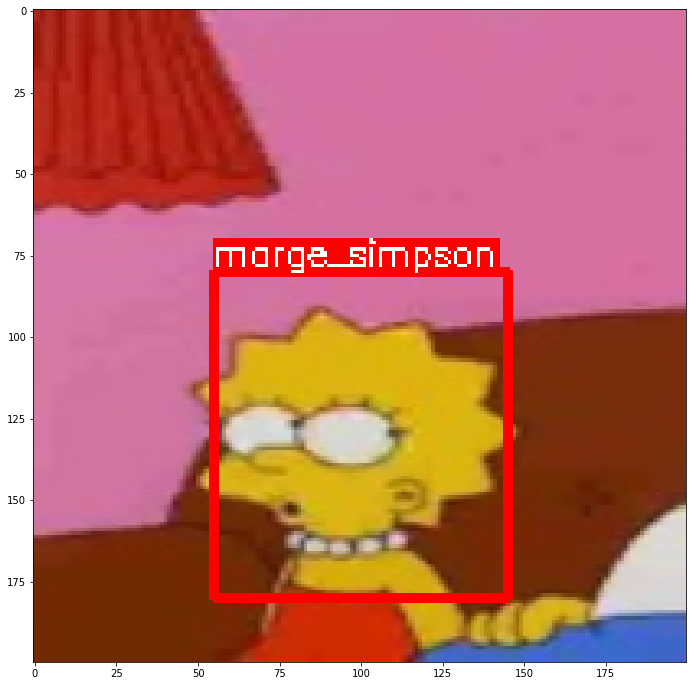

In [102]:
aug = get_aug([HorizontalFlip(p=1)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)